In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tabulate

In [ ]:
### 1. Listado de Directorio GDrive de Trabajo ###

import os
import pandas as pd
from tabulate import tabulate

# Definir el directorio
directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'

# Listar contenido del directorio con detalles
file_list = os.popen(f'ls -lt "{directory}"').read().strip().split('\n')

# Crear una lista para almacenar la información de los archivos
file_info = []

# Recorrer la lista de archivos y carpetas
for file in file_list[1:]:  # Excluir la primera línea que es la total
    parts = file.split(maxsplit=8)
    permissions = parts[0]
    num_links = parts[1]
    owner = parts[2]
    group = parts[3]
    size = parts[4]
    month = parts[5]
    day = parts[6]
    time_or_year = parts[7]
    filename = parts[8]
    file_type = 'Folder' if permissions[0] == 'd' else 'File'
    file_info.append([filename, file_type, permissions, num_links, owner, group, size, month, day, time_or_year])

# Crear un DataFrame
df = pd.DataFrame(file_info, columns=['Filename', 'Type', 'Permissions', 'Links', 'Owner', 'Group', 'Size', 'Month', 'Day', 'Time/Year'])

# Ordenar el DataFrame por Filename
df = df.sort_values(by='Filename')

# Mostrar el DataFrame en formato de tabla enmarcada usando tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒═════════════════════════════════════════════════════════════════════════╤════════╤═══════════════╤═════════╤═════════╤═════════╤════════════╤═════════╤═══════╤═════════════╕
│ Filename                                                                │ Type   │ Permissions   │   Links │ Owner   │ Group   │       Size │ Month   │   Day │ Time/Year   │
╞═════════════════════════════════════════════════════════════════════════╪════════╪═══════════════╪═════════╪═════════╪═════════╪════════════╪═════════╪═══════╪═════════════╡
│ Detección de daños en menisco de Rodilla (MRI) con el uso de AI.gslides │ File   │ -rw-------    │       1 │ root    │ root    │        174 │ Jul     │     7 │ 03:55       │
├─────────────────────────────────────────────────────────────────────────┼────────┼───────────────┼─────────┼─────────┼─────────┼────────────┼─────────┼───────┼─────────────┤
│ Vol01                                                                   │ Folder │ drwx------    │       2 │ root   

In [ ]:
### 2. Se resume el contenido de los folders de Imagens de Croacia: 917 Imagenes

import os
import pandas as pd
from tabulate import tabulate

# Definir el directorio principal y subdirectorios
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'

# Generar la lista de subdirectorios de Vol01 a Vol10
subdirectories = [os.path.join(main_directory, f'Vol{str(i).zfill(2)}') for i in range(1, 11)]

# Crear un resumen del número de archivos en cada subdirectorio
summary = []

for subdir in subdirectories:
    if not os.path.exists(subdir):
        summary.append([subdir, 0])
        continue

    file_list = os.listdir(subdir)
    num_files = len(file_list)
    summary.append([subdir, num_files])

# Convertir a DataFrame
summary_df = pd.DataFrame(summary, columns=['Directorio', 'Número de archivos'])

# Agregar fila de total
total_files = summary_df['Número de archivos'].sum()
total_df = pd.DataFrame([['Total', total_files]], columns=['Directorio', 'Número de archivos'])
summary_df = pd.concat([summary_df, total_df], ignore_index=True)

# Mostrar el cuadro resumen
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════════════════════════════════════════════════════════════╤══════════════════════╕
│ Directorio                                                                    │   Número de archivos │
╞═══════════════════════════════════════════════════════════════════════════════╪══════════════════════╡
│ /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol01 │                   92 │
├───────────────────────────────────────────────────────────────────────────────┼──────────────────────┤
│ /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol02 │                   92 │
├───────────────────────────────────────────────────────────────────────────────┼──────────────────────┤
│ /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol03 │                   92 │
├───────────────────────────────────────────────────────────────────────────────┼──────────────────────┤
│ /content/drive/My Drive/PUCP IA - Des. App. Visual - 

In [ ]:
### 3. SE LISTA EL CONTENIDO DE 1 directorio ###

#El código mostrado genera una tabla que lista el contenido del directorio de datos volumétricos (Vol01) con detalles de cada archivo, tales como permisos, número de enlaces,
#propietario, grupo, tamaño, mes, día y hora/año. La tabla también muestra el total de archivos en el directorio.

import os
import numpy as np
import pandas as pd
from tabulate import tabulate
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# Definir el directorio principal y subdirectorios
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
volumetric_data_dir = os.path.join(main_directory, 'Vol01')
metadata_csv_path = os.path.join(main_directory, 'metadata.csv')

# Verificar si el subdirectorio de datos volumétricos existe
if not os.path.exists(volumetric_data_dir):
    print(f"El subdirectorio '{volumetric_data_dir}' no existe.")
else:
    # Cargar los metadatos desde el archivo CSV
    metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True, dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20')

    print('Column names:')
    print(metadata.dtype.names)

    # Seleccionar todas las filas donde examID == 502889 (ajusta según tus necesidades)
    exams = metadata[metadata['examId'] == 502889]

    for exam in exams:
        vol_data_file = exam['volumeFilename']
        vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

        # Verificar si el archivo de datos volumétricos existe
        if not os.path.exists(vol_data_path):
            print(f"El archivo de datos volumétricos '{vol_data_path}' no existe.")
            continue

        # Cargar datos desde el archivo .pck
        with open(vol_data_path, 'rb') as file_handler:  # Debe usar 'rb' ya que los datos son binarios
            volumetric_data = pickle.load(file_handler)

        print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)

        # Obtener todas las slices de ROI del volumen
        z_start = exam['roiZ']
        depth = exam['roiDepth']

        for z in range(z_start, z_start + depth):
            slice = volumetric_data[z, :, :]

            # Obtener dimensiones de ROI
            x, y, w, h = [exam[attr] for attr in ['roiX', 'roiY', 'roiWidth', 'roiHeight']]

            # Extraer ROI
            roi = slice[y:y+h, x:x+w]

            # Plotear slice y ROI
            figure = plt.figure()
            plot = plt.subplot2grid((1, 4), (0, 0), 1, 3)  # Esto hace que el plot de slice sea más grande que el de ROI
            plot.add_patch(patch.Rectangle((x, y), w, h, fill=None, color='red'))
            plot.imshow(slice, cmap='gray')
            plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
            plot.imshow(roi, cmap='gray')

            plt.show()

    # Listar contenido del subdirectorio Vol10 con detalles y mostrar el total de archivos
    file_list = os.popen(f'ls -lt "{volumetric_data_dir}"').read().strip().split('\n')

    if len(file_list) <= 1:
        print(f"El subdirectorio '{volumetric_data_dir}' está vacío o no contiene archivos visibles.")
    else:
        file_info = []
        for idx, file in enumerate(file_list[1:], start=1):  # Excluir la primera línea que es la total y agregar índice
            parts = file.split(maxsplit=8)
            permissions = parts[0]
            num_links = parts[1]
            owner = parts[2]
            group = parts[3]
            size = parts[4]
            month = parts[5]
            day = parts[6]
            time_or_year = parts[7]
            filename = parts[8]
            file_info.append([idx, filename, permissions, num_links, owner, group, size, month, day, time_or_year, volumetric_data_dir])

        df = pd.DataFrame(file_info, columns=['Index', 'Filename', 'Permissions', 'Links', 'Owner', 'Group', 'Size', 'Month', 'Day', 'Time/Year', 'Directory'])

        total_files = len(df)
        print(f"Total de archivos: {total_files}\n")

        # Asegurarse de que el DataFrame esté ordenado por el índice
        df = df.sort_values(by='Index')

        print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

El subdirectorio '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol01' no existe.


In [ ]:
### 4. SE REVISA EL METADATA.CVS ###

import pandas as pd
from tabulate import tabulate

# Definir la ruta al archivo metadata.csv
metadata_csv_path = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/metadata.csv'

# Leer el archivo metadata.csv
metadata_df = pd.read_csv(metadata_csv_path)

# Mostrar las columnas disponibles en el archivo CSV
print("Columnas disponibles en el archivo CSV:")
print(metadata_df.columns)

# Mostrar las primeras 3 filas del archivo CSV
print("\nPrimeros 3 registros del archivo CSV:")
print(metadata_df.head(3))

# Distribución de los valores en la columna aclDiagnosis
acl_diagnosis_distribution = metadata_df['aclDiagnosis'].value_counts().sort_index()

# Crear un DataFrame con la distribución y las descripciones
acl_diagnosis_df = pd.DataFrame({
    'Count': acl_diagnosis_distribution,
    #'Description': ['0: healthy', '1: partially injured', '2: completely ruptured']
    'Description': ['0:Ligamento no lesionado (sano)','1:Ligamento parcialmente lesionado','2:Ligamento completamente roto']

})

# Asegurarse de que todas las categorías (0, 1, 2) están presentes
acl_diagnosis_df = acl_diagnosis_df.reindex([0, 1, 2], fill_value=0)

# Agregar una fila de total
total_row = pd.DataFrame({'Count': [acl_diagnosis_df['Count'].sum()], 'Description': ['Total']})
acl_diagnosis_df = pd.concat([acl_diagnosis_df, total_row])

# Mostrar la tabla con cuadrícula
print("\nDistribución de valores en aclDiagnosis:")
print(tabulate(acl_diagnosis_df, headers='keys', tablefmt='fancy_grid'))

Columnas disponibles en el archivo CSV:
Index(['examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ',
       'roiHeight', 'roiWidth', 'roiDepth', 'volumeFilename'],
      dtype='object')

Primeros 3 registros del archivo CSV:
   examId  seriesNo  aclDiagnosis  kneeLR  roiX  roiY  roiZ  roiHeight  \
0  329637         8             0       1   139   184    14         74   
1  390116         9             0       0   113   105    10         83   
2  404663         8             1       1   120   117    15        101   

   roiWidth  roiDepth volumeFilename  
0        72         3   329637-8.pck  
1        98         6   390116-9.pck  
2       115         2   404663-8.pck  

Distribución de valores en aclDiagnosis:
╒════╤═════════╤════════════════════════════════════╕
│    │   Count │ Description                        │
╞════╪═════════╪════════════════════════════════════╡
│  0 │     690 │ 0:Ligamento no lesionado (sano)    │
├────┼─────────┼──────────────────────────────

Mounted at /content/drive
Column names:
('examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth', 'volumeFilename')

Shape of volume "/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol10/1001866-5.pck": (32, 320, 320)


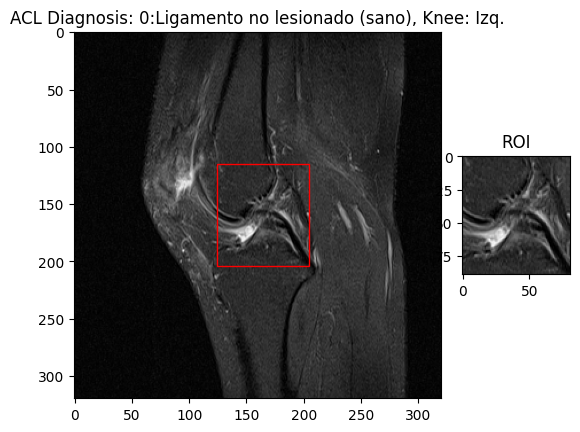

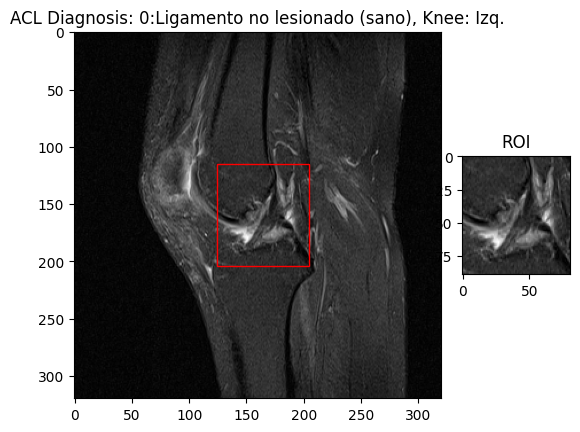

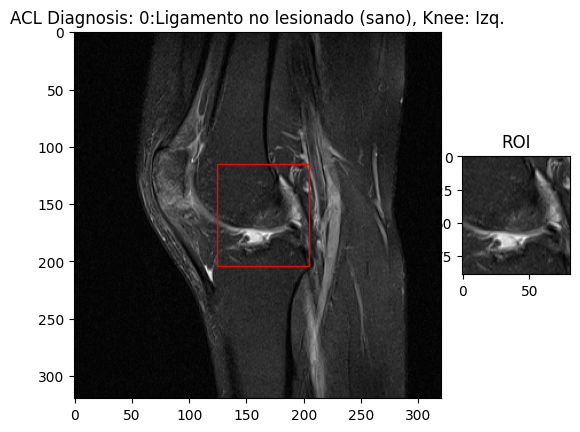

In [ ]:
### 5. SE MUESTRA 1 FOTO COM X SLICES Y DIAGNOSTICO ###

import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Directorio principal y subdirectorios
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
volumetric_data_dir = os.path.join(main_directory, 'Vol10')
metadata_csv_path = os.path.join(main_directory, 'metadata.csv')

# Cargar los metadatos desde el archivo CSV
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True,
    dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20')

print('Column names:')
print(metadata.dtype.names)

# Diccionario para interpretar los valores de aclDiagnosis y kneeLR
acl_diagnosis_dict = {0: '0:Ligamento no lesionado (sano)', 1: '1:Ligamento parcialmente lesionado', 2: '2:Ligamento completamente roto'}
knee_lr_dict = {0: 'Izq.', 1: 'Der.'}

# Seleccionar todas las filas donde examID == 1001866 (ajusta según tus necesidades)
exams = metadata[metadata['examId'] == 1001866]

for exam in exams:
    vol_data_file = exam['volumeFilename']
    acl_diagnosis = acl_diagnosis_dict.get(exam['aclDiagnosis'], 'Unknown')
    knee_lr = knee_lr_dict.get(exam['kneeLR'], 'Unknown')

    vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

    # Verificar si el archivo de datos volumétricos existe
    if not os.path.exists(vol_data_path):
        print(f"El archivo de datos volumétricos '{vol_data_path}' no existe.")
        continue

    # Cargar datos desde el archivo .pck
    with open(vol_data_path, 'rb') as file_handler:  # Debe usar 'rb' ya que los datos son binarios
        volumetric_data = pickle.load(file_handler)

    print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)

    # Obtener todas las slices de ROI del volumen
    z_start = exam['roiZ']
    depth = exam['roiDepth']

    for z in range(z_start, z_start + depth):
        slice = volumetric_data[z, :, :]

        # Obtener dimensiones de ROI
        x, y, w, h = [exam[attr] for attr in ['roiX', 'roiY', 'roiWidth', 'roiHeight']]

        # Extraer ROI
        roi = slice[y:y+h, x:x+w]

        # Plotear slice y ROI con etiquetas
        figure = plt.figure()
        plot = plt.subplot2grid((1, 4), (0, 0), 1, 3)  # Esto hace que el plot de slice sea más grande que el de ROI
        plot.add_patch(patch.Rectangle((x, y), w, h, fill=None, color='red'))
        plot.imshow(slice, cmap='gray')
        plot.set_title(f'ACL Diagnosis: {acl_diagnosis}, Knee: {knee_lr}')
        plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
        plot.imshow(roi, cmap='gray')
        plot.set_title('ROI')

        plt.show()

In [ ]:
### 6. Se imprime detalles de caracteristicas de fotos unicamente de VOL10 : 'Index', 'Filename', 'Width', 'Height', 'Depth', 'Format ###

import os
import pickle
import pandas as pd

# Directorio de archivos .pck
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
volumetric_data_dir = os.path.join(main_directory, 'Vol10')

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Recorrer los archivos en el directorio
for idx, data_name in enumerate(os.listdir(volumetric_data_dir)):
    data_path = os.path.join(volumetric_data_dir, data_name)

    # Verificar si el archivo es un .pck
    if data_path.endswith('.pck'):
        with open(data_path, 'rb') as file_handler:
            try:
                data = pickle.load(file_handler)
                # Obtener las dimensiones del volumen
                if isinstance(data, np.ndarray):
                    depth, height, width = data.shape
                    data_info.append([idx + 1, data_name, width, height, depth, 'pck'])
                else:
                    print(f"El archivo {data_name} no es un ndarray.")
            except Exception as e:
                print(f"Error al leer el archivo {data_name}: {e}")

# Crear un DataFrame de pandas para mostrar la información en una tabla
df = pd.DataFrame(data_info, columns=['Index', 'Filename', 'Width', 'Height', 'Depth', 'Format'])

# Mostrar la tabla
print(df.to_markdown(index=False))

#7.UNIFICACION DE TODOS LOS ARCHIVOS EN 1 SOLO ; Vol110 ####

In [ ]:
### 7.UNIFICACION DE TODOS LOS ARCHIVOS EN 1 SOLO ; Vol110 ####

import os
import shutil

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'

# Crear o limpiar el nuevo directorio Vol110
vol110_dir = os.path.join(main_directory, 'Vol110')
if os.path.exists(vol110_dir):
    shutil.rmtree(vol110_dir)  # Eliminar el directorio y su contenido
os.makedirs(vol110_dir, exist_ok=True)  # Crear el directorio vacío

# Subdirectorios Vol01 a Vol10
subdirectories = [f'Vol{str(i).zfill(2)}' for i in range(1, 11)]

# Lista para almacenar los subdirectorios leídos
read_subdirectories = []

# Conjunto para almacenar los nombres de archivos y detectar duplicados
file_names_set = set()
duplicates = []

# Recorrer los subdirectorios y copiar el contenido a Vol110
for subdir in subdirectories:
    subdir_path = os.path.join(main_directory, subdir)
    if os.path.exists(subdir_path):
        read_subdirectories.append(subdir)
        for item in os.listdir(subdir_path):
            item_path = os.path.join(subdir_path, item)
            if os.path.isfile(item_path):  # Verificar si es un archivo
                if item in file_names_set:
                    duplicates.append(item)
                else:
                    file_names_set.add(item)
                    shutil.copy2(item_path, vol110_dir)
            elif os.path.isdir(item_path):  # Verificar si es un directorio
                if item in file_names_set:
                    duplicates.append(item)
                else:
                    file_names_set.add(item)
                    shutil.copytree(item_path, os.path.join(vol110_dir, item), dirs_exist_ok=True)

# Contar el número total de archivos en Vol110
total_files = sum([len(files) for r, d, files in os.walk(vol110_dir)])

# Mostrar los resultados en tres oraciones
print(f"Se ha creado el directorio '{vol110_dir}'.")
print(f"Se ha copiado el contenido de los siguientes subdirectorios: {', '.join(read_subdirectories)}.")
print(f"Total de archivos en 'Vol110': {total_files}.")

# Reportar archivos duplicados
if duplicates:
    print("Archivos duplicados encontrados:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No se encontraron archivos duplicados.")

Mounted at /content/drive
Se ha creado el directorio '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol110'.
Se ha copiado el contenido de los siguientes subdirectorios: Vol01, Vol02, Vol03, Vol04, Vol05, Vol06, Vol07, Vol08, Vol09, Vol10.
Total de archivos en 'Vol110': 917.
No se encontraron archivos duplicados.


In [ ]:
### 8. SE IMSPECCIONA FODER CONSOLIDADO DE IMAGENES (Vol110) y se lista  ANCHO , LARGO Y PROFUNIDAD

import os
import pickle
import numpy as np
import pandas as pd

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
vol110_dir = os.path.join(main_directory, 'Vol110')

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Recorrer los archivos en el directorio Vol110
if os.path.exists(vol110_dir):
    for data_name in os.listdir(vol110_dir):
        data_path = os.path.join(vol110_dir, data_name)

        # Verificar si el archivo es un .pck
        if data_path.endswith('.pck'):
            with open(data_path, 'rb') as file_handler:
                try:
                    data = pickle.load(file_handler)
                    # Obtener las dimensiones del volumen
                    if isinstance(data, np.ndarray):
                        depth, height, width = data.shape
                        data_info.append([data_name, width, height, depth])
                    else:
                        print(f"El archivo {data_name} no es un ndarray.")
                except Exception as e:
                    print(f"Error al leer el archivo {data_name}: {e}")

# Crear un DataFrame de pandas para analizar la información
df = pd.DataFrame(data_info, columns=['Filename', 'Width', 'Height', 'Depth'])

# Determinar si todas las fotos tienen el mismo Width, Height y Depth
same_width = df['Width'].nunique() == 1
same_height = df['Height'].nunique() == 1
same_depth = df['Depth'].nunique() == 1

# Obtener los valores de Width, Height y Depth si son iguales
width_value = df['Width'].iloc[0] if same_width else "Varios valores"
height_value = df['Height'].iloc[0] if same_height else "Varios valores"
depth_value = df['Depth'].iloc[0] if same_depth else "Varios valores"

# Contar el número de registros analizados
num_records = len(df)

# Obtener todos los valores únicos de Width, Height y Depth
unique_widths = df['Width'].unique()
unique_heights = df['Height'].unique()
unique_depths = df['Depth'].unique()

# Mostrar los resultados en tres oraciones
print(f"¿Todas las fotos tienen el mismo ancho (Width)? {'Sí' if same_width else 'No'}, Valor: {width_value}")
print(f"¿Todas las fotos tienen la misma altura (Height)? {'Sí' if same_height else 'No'}, Valor: {height_value}")
print(f"¿Todas las fotos tienen la misma profundidad (Depth)? {'Sí' if same_depth else 'No'}, Valor: {depth_value}")
print(f"Total de registros analizados: {num_records}")

# Reportar los valores encontrados
print("\nValores encontrados:")
print(f"Width: {unique_widths}")
print(f"Height: {unique_heights}")
print(f"Depth: {unique_depths}")



¿Todas las fotos tienen el mismo ancho (Width)? No, Valor: Varios valores
¿Todas las fotos tienen la misma altura (Height)? No, Valor: Varios valores
¿Todas las fotos tienen la misma profundidad (Depth)? No, Valor: Varios valores
Total de registros analizados: 917

Valores encontrados:
Width: [320 308 300 316]
Height: [320 292 290 312]
Depth: [27 34 33 30 23 25 26 28 32 37 22 29 35 36 21 38 31 24 45]


#I.CONVERSION W/L/D 320X320X36 CREA Vol110-NEWFORMAT320x320x36

In [ ]:
##### 08 SE FORMATEA TODO A 36-320-32 Y SE ENVIA A NUEVO FOLDER Vol110-NEWFORMAT320x320x36
##### 08 TAMBIEN SE HACE CHECK

import os
import pickle
import numpy as np
import scipy.ndimage
import shutil

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
vol110_dir = os.path.join(main_directory, 'Vol110')
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36')

# Crear el nuevo directorio Vol110-NEWFORMAT320x320x36
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)  # Eliminar el directorio y su contenido
os.makedirs(target_dir, exist_ok=True)  # Crear el directorio vacío

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Función para redimensionar las imágenes
def resize_volume(volume, target_shape):
    depth, height, width = target_shape
    resized_volume = np.zeros((depth, height, width), dtype=volume.dtype)

    # Redimensionar las slices individualmente
    for i in range(min(volume.shape[0], depth)):
        resized_volume[i] = scipy.ndimage.zoom(volume[i], (height / volume.shape[1], width / volume.shape[2]), order=1)

    # Si el volumen original es menor en profundidad, replicar las últimas slices
    if volume.shape[0] < depth:
        for i in range(volume.shape[0], depth):
            resized_volume[i] = resized_volume[volume.shape[0] - 1]

    return resized_volume

# Recorrer los archivos en el directorio Vol110
if os.path.exists(vol110_dir):
    for data_name in os.listdir(vol110_dir):
        data_path = os.path.join(vol110_dir, data_name)

        # Verificar si el archivo es un .pck
        if data_path.endswith('.pck'):
            with open(data_path, 'rb') as file_handler:
                try:
                    data = pickle.load(file_handler)
                    # Verificar si los datos son un ndarray
                    if isinstance(data, np.ndarray):
                        # Redimensionar el volumen a 320x320x36
                        new_depth, new_height, new_width = 36, 320, 320
                        resized_data = resize_volume(data, (new_depth, new_height, new_width))
                        # Guardar los datos redimensionados en el nuevo directorio con el mismo nombre
                        target_path = os.path.join(target_dir, data_name)
                        with open(target_path, 'wb') as target_file_handler:
                            pickle.dump(resized_data, target_file_handler)
                        # Almacenar información del archivo procesado
                        data_info.append([data_name, data.shape[2], data.shape[1], data.shape[0], new_width, new_height, new_depth])
                    else:
                        print(f"El archivo {data_name} no es un ndarray.")
                except Exception as e:
                    print(f"Error al leer el archivo {data_name}: {e}")

# Crear un DataFrame de pandas para analizar la información
df = pd.DataFrame(data_info, columns=['Filename', 'Original Width', 'Original Height', 'Original Depth', 'New Width', 'New Height', 'New Depth'])

# Determinar si todas las fotos tienen el mismo Width, Height y Depth
same_width = df['New Width'].nunique() == 1
same_height = df['New Height'].nunique() == 1
same_depth = df['New Depth'].nunique() == 1

# Obtener los valores de Width, Height y Depth si son iguales
width_value = df['New Width'].iloc[0] if same_width else "Varios valores"
height_value = df['New Height'].iloc[0] if same_height else "Varios valores"
depth_value = df['New Depth'].iloc[0] if same_depth else "Varios valores"

# Contar el número de registros analizados
num_records = len(df)

# Mostrar los resultados
print(f"Total de registros procesados: {num_records}")
print(f"¿Todas las fotos en '{target_dir}' tienen el mismo ancho (Width) y altura (Height) y profundidad (Depth) de 320x320x36? {'Sí' if same_width and same_height and same_depth else 'No'}")
print(f"Ancho (Width): {df['New Width'].unique()}")
print(f"Altura (Height): {df['New Height'].unique()}")
print(f"Profundidad (Depth): {df['New Depth'].unique()}")

# Detallar dimensiones originales y nuevas de los archivos procesados
print("\nDimensiones originales y nuevas de los archivos procesados:")
print(df)


Total de registros procesados: 917
¿Todas las fotos en '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol110-NEWFORMAT320x320x36' tienen el mismo ancho (Width) y altura (Height) y profundidad (Depth) de 320x320x36? Sí
Ancho (Width): [320]
Altura (Height): [320]
Profundidad (Depth): [36]

Dimensiones originales y nuevas de los archivos procesados:
          Filename  Original Width  Original Height  Original Depth  \
0     412865-8.pck             320              320              27   
1     484808-6.pck             320              320              34   
2     482432-6.pck             320              320              33   
3     491387-5.pck             320              320              34   
4     475047-7.pck             320              320              30   
..             ...             ...              ...             ...   
912   984295-6.pck             320              320              32   
913  1027212-5.pck             320              320      

In [ ]:
### SE VERIFICA QUE NO HAYAN DUPLICADOS EN /Vol110-NEWFORMAT320x320x36

import os
import hashlib

# Directorio a verificar
directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol110-NEWFORMAT320x320x36'

# Diccionario para almacenar los hash de los archivos y sus nombres
hash_dict = {}
unique_files = []
duplicate_files = []

def hash_file(file_path):
    """Generar el hash SHA-256 del contenido de un archivo"""
    sha256_hash = hashlib.sha256()
    with open(file_path, 'rb') as f:
        for byte_block in iter(lambda: f.read(4096), b""):
            sha256_hash.update(byte_block)
    return sha256_hash.hexdigest()

# Recorrer los archivos en el directorio
total_files = 0
for root, dirs, files in os.walk(directory):
    total_files += len(files)
    for file_name in files:
        file_path = os.path.join(root, file_name)

        # Generar el hash del archivo
        file_hash = hash_file(file_path)

        if file_hash not in hash_dict:
            hash_dict[file_hash] = file_name
            unique_files.append(file_name)
        else:
            duplicate_files.append((file_name, hash_dict[file_hash]))

# Número de archivos únicos
unique_files_count = len(unique_files)

# Mostrar los resultados
print(f"Total de archivos en '{directory}': {total_files}")
print(f"Número de archivos únicos: {unique_files_count}")
print(f"Número de archivos duplicados: {total_files - unique_files_count}")

# Listar los archivos duplicados con el criterio de duplicidad
if duplicate_files:
    print("Archivos duplicados (Nombre del archivo duplicado -> Nombre del archivo original):")
    for duplicate, original in duplicate_files:
        print(f"{duplicate} -> {original}")
else:
    print("No se encontraron archivos duplicados.")

Total de archivos en '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol110-NEWFORMAT320x320x36': 917
Número de archivos únicos: 916
Número de archivos duplicados: 1
Archivos duplicados (Nombre del archivo duplicado -> Nombre del archivo original):
984116-5.pck -> 984110-5.pck


#II. PUNTO DE CONTROL LUEGO DE 320X320X36

In [ ]:
#### 09.  VAMOS A VERIFICAR QUE LOS 917 CASOS DE Vol110-NEWFORMAT320x320x36, ESTAN TODOS STANDARIZED A 320X320X36####

import os
import pickle
import numpy as np
import pandas as pd

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
vol110_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36')

# Verificar la existencia del directorio
if not os.path.exists(vol110_dir):
    raise FileNotFoundError(f"El directorio {vol110_dir} no existe.")

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Recorrer los archivos en el directorio Vol110
for data_name in os.listdir(vol110_dir):
    data_path = os.path.join(vol110_dir, data_name)

    # Verificar si el archivo es un .pck
    if not data_path.endswith('.pck'):
        print(f"El archivo {data_name} no es un archivo .pck, omitiendo.")
        continue

    # Intentar abrir y cargar el archivo .pck
    try:
        with open(data_path, 'rb') as file_handler:
            data = pickle.load(file_handler)

        # Verificar si los datos son un ndarray
        if not isinstance(data, np.ndarray):
            print(f"El archivo {data_name} no es un ndarray, omitiendo.")
            continue

        # Obtener las dimensiones del volumen
        depth, height, width = data.shape
        data_info.append([data_name, width, height, depth])

    except Exception as e:
        print(f"Error al leer el archivo {data_name}: {e}")

# Crear un DataFrame de pandas para analizar la información
df = pd.DataFrame(data_info, columns=['Filename', 'Width', 'Height', 'Depth'])

# Determinar si todas las fotos tienen el mismo Width, Height y Depth
same_width = df['Width'].nunique() == 1
same_height = df['Height'].nunique() == 1
same_depth = df['Depth'].nunique() == 1

# Obtener los valores de Width, Height y Depth si son iguales
width_value = df['Width'].iloc[0] if same_width else "Varios valores"
height_value = df['Height'].iloc[0] if same_height else "Varios valores"
depth_value = df['Depth'].iloc[0] if same_depth else "Varios valores"

# Contar el número de registros analizados
num_records = len(df)

# Obtener todos los valores únicos de Width, Height y Depth
unique_widths = df['Width'].unique()
unique_heights = df['Height'].unique()
unique_depths = df['Depth'].unique()

# Mostrar los resultados en tres oraciones
print(f"¿Todas las fotos tienen el mismo ancho (Width)? {'Sí' if same_width else 'No'}, Valor: {width_value}")
print(f"¿Todas las fotos tienen la misma altura (Height)? {'Sí' if same_height else 'No'}, Valor: {height_value}")
print(f"¿Todas las fotos tienen la misma profundidad (Depth)? {'Sí' if same_depth else 'No'}, Valor: {depth_value}")
print(f"Total de registros analizados: {num_records}")

# Reportar los valores encontrados
print("\nValores encontrados:")
print(f"Width: {unique_widths}")
print(f"Height: {unique_heights}")
print(f"Depth: {unique_depths}")

¿Todas las fotos tienen el mismo ancho (Width)? Sí, Valor: 320
¿Todas las fotos tienen la misma altura (Height)? Sí, Valor: 320
¿Todas las fotos tienen la misma profundidad (Depth)? Sí, Valor: 36
Total de registros analizados: 917

Valores encontrados:
Width: [320]
Height: [320]
Depth: [36]


#III. CONVERSION 2 - GAUSSIANO /// CREA Vol110-NEWFORMAT320x320x36GAUSS

In [ ]:
# 10 GAUSSS
##### El código carga un volumen 3D desde un archivo .pck, toma una slice del volumen, aplica un filtro Gaussiano para
##### eliminar el ruido de la slice, guarda la slice filtrada en un nuevo directorio, y muestra comparaciones visuales entre la imagen original
##### y la imagen sin ruido.
import os
import pickle
import numpy as np
import scipy.ndimage
import shutil
import logging

# Configuración del log
log_file = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/processing_log.txt'
logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36')
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS')

# Vaciar el directorio de destino si ya existe
if os.path.exists(target_dir):
    try:
        shutil.rmtree(target_dir)
        logging.info(f"Directorio de destino {target_dir} vaciado correctamente.")
    except Exception as e:
        logging.error(f"Error al vaciar el directorio de destino {target_dir}: {e}")

# Crear el nuevo directorio para datos sin ruido
os.makedirs(target_dir, exist_ok=True)

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Recorrer los archivos en el directorio Vol110-NEWFORMAT320x320x36
if os.path.exists(source_dir):
    for data_name in os.listdir(source_dir):
        data_path = os.path.join(source_dir, data_name)

        # Verificar si el archivo es un .pck
        if data_path.endswith('.pck'):
            try:
                with open(data_path, 'rb') as file_handler:
                    data = pickle.load(file_handler)

                # Verificar si los datos son un ndarray y tienen las dimensiones esperadas
                if isinstance(data, np.ndarray) and data.shape == (36, 320, 320):
                    try:
                        # Aplicar filtro gaussiano para eliminar el ruido
                        denoised_data = scipy.ndimage.gaussian_filter(data, sigma=1)

                        # Guardar los datos filtrados en el nuevo directorio con el mismo nombre
                        target_path = os.path.join(target_dir, data_name)
                        with open(target_path, 'wb') as target_file_handler:
                            pickle.dump(denoised_data, target_file_handler)

                        # Almacenar información del archivo procesado
                        data_info.append([data_name])
                        logging.info(f"Archivo procesado correctamente: {data_name}")

                    except Exception as e:
                        logging.error(f"Error al aplicar el filtro Gaussiano en {data_name}: {e}")
                else:
                    logging.warning(f"El archivo {data_name} no es un ndarray con las dimensiones esperadas (36, 320, 320).")
            except Exception as e:
                logging.error(f"Error al leer el archivo {data_name}: {e}")

# Contar el número de registros analizados
num_records = len(data_info)

# Contar el número de archivos en el directorio de destino
num_files_in_target_dir = len(os.listdir(target_dir))

# Mostrar el resultado
print(f"\nACABE, PROCESE VIA GAUSS EL TOTAL DE {num_records} IMAGENES")
print(f"Total de archivos en '{target_dir}': {num_files_in_target_dir}")

# Registrar los resultados en el log
logging.info(f"\nACABE, PROCESE VIA GAUSS EL TOTAL DE {num_records} IMAGENES")
logging.info(f"Total de archivos en '{target_dir}': {num_files_in_target_dir}")



ACABE, PROCESE VIA GAUSS EL TOTAL DE 917 IMAGENES
Total de archivos en '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/Vol110-NEWFORMAT320x320x36GAUSS': 917


#IV. PUNTO DE CONTROL 1 LUEGO DE GAUSS

In [ ]:
#### CHECK PARA VER QUE GAUSS PASO BIEN - SE REVISAR TODOS LOS FILES

import os
import pickle
import numpy as np
import hashlib
import pandas as pd
import logging

# Configuración del log
log_file = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/verification_log.txt'
logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36')
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS')

# Función para generar hash de un archivo
def generate_file_hash(file_path):
    sha256_hash = hashlib.sha256()
    with open(file_path, 'rb') as f:
        for byte_block in iter(lambda: f.read(4096), b""):
            sha256_hash.update(byte_block)
    return sha256_hash.hexdigest()

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Contadores de errores y advertencias
error_count = 0
warning_count = 0

# Verificar que el directorio de origen y destino existen
if not os.path.exists(source_dir):
    raise FileNotFoundError(f"El directorio de origen {source_dir} no existe.")
if not os.path.exists(target_dir):
    raise FileNotFoundError(f"El directorio de destino {target_dir} no existe.")

# Recorrer los archivos en el directorio Vol110-NEWFORMAT320x320x36
for data_name in os.listdir(source_dir):
    source_path = os.path.join(source_dir, data_name)
    target_path = os.path.join(target_dir, data_name)

    # Verificar si el archivo es un .pck
    if source_path.endswith('.pck') and target_path.endswith('.pck'):
        try:
            # Cargar el archivo original
            with open(source_path, 'rb') as source_file_handler:
                source_data = pickle.load(source_file_handler)

            # Cargar el archivo procesado
            with open(target_path, 'rb') as target_file_handler:
                target_data = pickle.load(target_file_handler)

            # Verificar si los datos son un ndarray y tienen las dimensiones esperadas
            if isinstance(source_data, np.ndarray) and source_data.shape == (36, 320, 320):
                # Generar hashes para verificar integridad
                source_hash = generate_file_hash(source_path)
                target_hash = generate_file_hash(target_path)

                # Almacenar información del archivo procesado
                data_info.append([data_name, source_hash, target_hash])
                logging.info(f"Archivo verificado correctamente: {data_name}")

            else:
                warning_count += 1
                logging.warning(f"El archivo {data_name} no es un ndarray con las dimensiones esperadas (36, 320, 320).")

        except Exception as e:
            error_count += 1
            logging.error(f"Error al leer el archivo {data_name}: {e}")

# Crear un DataFrame para análisis adicional
df = pd.DataFrame(data_info, columns=['Filename', 'Original Hash', 'Processed Hash'])

# Guardar el DataFrame en un archivo CSV para referencia futura
report_path = os.path.join(main_directory, 'verified_files_report.csv')
df.to_csv(report_path, index=False)

# Mensaje final basado en errores y advertencias
if error_count == 0 and warning_count == 0:
    final_message = "El procesamiento Gaussiano se realizó correctamente sin problemas."
else:
    final_message = f"El procesamiento Gaussiano encontró {error_count} errores y {warning_count} advertencias. Revisa el log para más detalles."

print(f"Verificación completa. Reporte detallado guardado en: {report_path}")
logging.info(f"Verificación completa. Reporte detallado guardado en: {report_path}")
print(final_message)
logging.info(final_message)

Verificación completa. Reporte detallado guardado en: /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/verified_files_report.csv
El procesamiento Gaussiano se realizó correctamente sin problemas.


V. VER 1 CASO DE PASE POR GAUSS

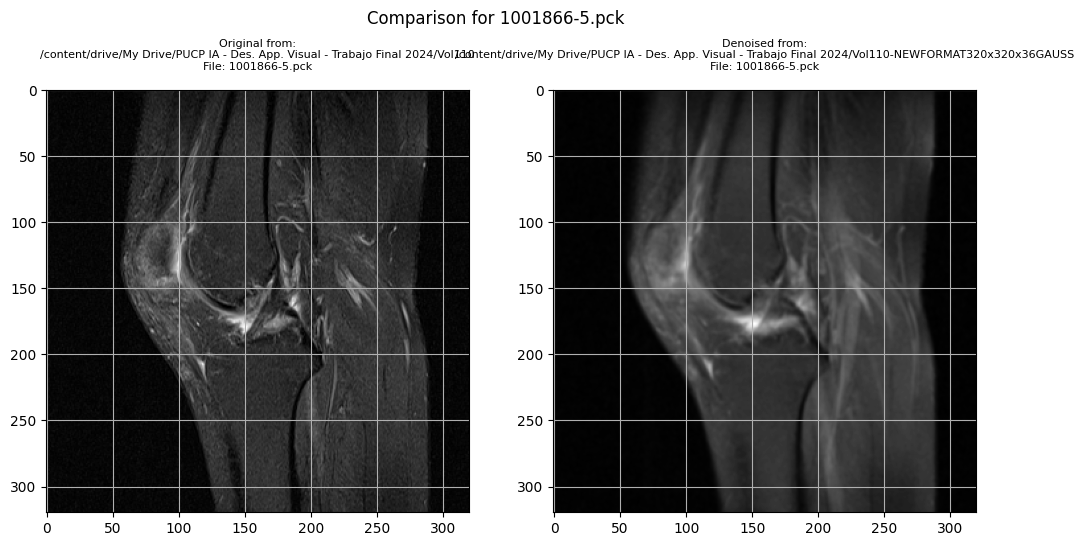

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
vol110_dir = os.path.join(main_directory, 'Vol110')
gauss_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS')

# Nombre del archivo a visualizar
file_name = '1001866-5.pck'

# Rutas completas a los archivos
vol110_file_path = os.path.join(vol110_dir, file_name)
gauss_file_path = os.path.join(gauss_dir, file_name)

# Función para cargar el archivo .pck
def load_pck_file(file_path):
    with open(file_path, 'rb') as file_handler:
        data = pickle.load(file_handler)
    return data

# Cargar los datos de los archivos
vol110_data = load_pck_file(vol110_file_path)
gauss_data = load_pck_file(gauss_file_path)

# Verificar si los datos son un ndarray
if isinstance(vol110_data, np.ndarray) and isinstance(gauss_data, np.ndarray):
    # Tomar una slice del volumen para visualización
    slice_index = vol110_data.shape[0] // 2  # Seleccionar la slice central para una comparación representativa
    vol110_slice = vol110_data[slice_index, :, :]
    gauss_slice = gauss_data[slice_index, :, :]

    # Mostrar la imagen original y la imagen sin ruido
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(vol110_slice, cmap='gray')
    axs[0].set_title(f'Original from:\n{vol110_dir}\nFile: {file_name}\n', fontsize=8)
    axs[0].axis('on')
    axs[0].grid(True)

    axs[1].imshow(gauss_slice, cmap='gray')
    axs[1].set_title(f'Denoised from:\n{gauss_dir}\nFile: {file_name}\n', fontsize=8)
    axs[1].axis('on')
    axs[1].grid(True)

    fig.suptitle(f'Comparison for {file_name}', fontsize=12)
    plt.show()
else:
    print(f"Uno o ambos archivos no contienen un ndarray. Archivos revisados: {vol110_file_path} y {gauss_file_path}")

#V.NORMALIZACION (0,1). SE CREA Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED

In [ ]:
#11.ML - PROCESO DE NORMALIZACION (0,1)

import os
import pickle
import numpy as np
import shutil

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS')  # Directorio de origen
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')  # Nuevo directorio de destino

# Crear el nuevo directorio para los datos normalizados
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)  # Eliminar el directorio y su contenido
os.makedirs(target_dir, exist_ok=True)  # Crear el directorio vacío

# Función para normalizar los volúmenes
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    normalized_volume = (volume - min_val) / (max_val - min_val)
    return normalized_volume

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Recorrer los archivos en el directorio de origen
for data_name in os.listdir(source_dir):
    data_path = os.path.join(source_dir, data_name)

    # Verificar si el archivo es un .pck
    if data_path.endswith('.pck'):
        with open(data_path, 'rb') as file_handler:
            try:
                data = pickle.load(file_handler)
                # Verificar si los datos son un ndarray y tienen las dimensiones esperadas
                if isinstance(data, np.ndarray) and data.shape == (36, 320, 320):
                    # Normalizar el volumen
                    normalized_data = normalize_volume(data)
                    # Guardar los datos normalizados en el nuevo directorio con el mismo nombre
                    target_path = os.path.join(target_dir, data_name)
                    with open(target_path, 'wb') as target_file_handler:
                        pickle.dump(normalized_data, target_file_handler)
                    # Almacenar información del archivo procesado
                    data_info.append([data_name, data.shape])
                    print(f"Archivo {data_name} normalizado y guardado correctamente.")  # Punto de control
                else:
                    print(f"El archivo {data_name} no es un ndarray con las dimensiones esperadas (36, 320, 320).")
            except Exception as e:
                print(f"Error al leer el archivo {data_name}: {e}")

# Contar el número de registros procesados
num_records = len(data_info)

# Mostrar el resultado final
print(f"\nNORMALIZACIÓN FINALIZADA SATISFACTORIAMENTE. {num_records} RECORDS NORMALIZADOS")


Archivo 412865-8.pck normalizado y guardado correctamente.
Archivo 484808-6.pck normalizado y guardado correctamente.
Archivo 482432-6.pck normalizado y guardado correctamente.
Archivo 491387-5.pck normalizado y guardado correctamente.
Archivo 475047-7.pck normalizado y guardado correctamente.
Archivo 496580-5.pck normalizado y guardado correctamente.
Archivo 487493-6.pck normalizado y guardado correctamente.
Archivo 485761-6.pck normalizado y guardado correctamente.
Archivo 491596-5.pck normalizado y guardado correctamente.
Archivo 479235-6.pck normalizado y guardado correctamente.
Archivo 462792-9.pck normalizado y guardado correctamente.
Archivo 480133-6.pck normalizado y guardado correctamente.
Archivo 457531-6.pck normalizado y guardado correctamente.
Archivo 481331-7.pck normalizado y guardado correctamente.
Archivo 494350-5.pck normalizado y guardado correctamente.
Archivo 466435-8.pck normalizado y guardado correctamente.
Archivo 498724-5.pck normalizado y guardado correctament

In [ ]:
#11.ML - PROCESO DE NORMALIZACION (0,1) pero que pasen todas de GAUSS !!!

import os
import pickle
import numpy as np
import shutil

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS')  # Directorio de origen
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')  # Nuevo directorio de destino

# Crear el nuevo directorio para los datos normalizados
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)  # Eliminar el directorio y su contenido
os.makedirs(target_dir, exist_ok=True)  # Crear el directorio vacío

# Función para normalizar los volúmenes
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    normalized_volume = (volume - min_val) / (max_val - min_val)
    return normalized_volume

# Crear una lista para almacenar la información de los archivos .pck
data_info = []

# Contar el número total de archivos en el directorio de origen
total_files_in_source = len([name for name in os.listdir(source_dir) if name.endswith('.pck')])
print(f"Total de archivos en el directorio de origen: {total_files_in_source}")

# Recorrer los archivos en el directorio de origen
for data_name in os.listdir(source_dir):
    data_path = os.path.join(source_dir, data_name)

    # Verificar si el archivo es un .pck
    if data_path.endswith('.pck'):
        with open(data_path, 'rb') as file_handler:
            try:
                data = pickle.load(file_handler)
                # Verificar si los datos son un ndarray y tienen las dimensiones esperadas
                if isinstance(data, np.ndarray) and data.shape == (36, 320, 320):
                    # Normalizar el volumen
                    normalized_data = normalize_volume(data)
                    # Guardar los datos normalizados en el nuevo directorio con el mismo nombre
                    target_path = os.path.join(target_dir, data_name)
                    with open(target_path, 'wb') as target_file_handler:
                        pickle.dump(normalized_data, target_file_handler)
                    # Almacenar información del archivo procesado
                    data_info.append([data_name, data.shape])
                    print(f"Archivo {data_name} normalizado y guardado correctamente.")  # Punto de control
                else:
                    print(f"El archivo {data_name} no es un ndarray con las dimensiones esperadas (36, 320, 320).")
            except Exception as e:
                print(f"Error al leer el archivo {data_name}: {e}")

# Contar el número de registros procesados
num_records = len(data_info)

# Mostrar el resultado final
print(f"\nNORMALIZACIÓN FINALIZADA SATISFACTORIAMENTE. {num_records} RECORDS NORMALIZADOS")

# Verificar si el número de registros procesados coincide con el número total de archivos en el directorio de origen
if num_records == total_files_in_source:
    print("Todos los archivos fueron procesados correctamente.")
else:
    print(f"Advertencia: Algunos archivos no fueron procesados. Total procesados: {num_records}, Total esperados: {total_files_in_source}")


Total de archivos en el directorio de origen: 917
Archivo 412865-8.pck normalizado y guardado correctamente.
Archivo 484808-6.pck normalizado y guardado correctamente.
Archivo 482432-6.pck normalizado y guardado correctamente.
Archivo 491387-5.pck normalizado y guardado correctamente.
Archivo 475047-7.pck normalizado y guardado correctamente.
Archivo 496580-5.pck normalizado y guardado correctamente.
Archivo 487493-6.pck normalizado y guardado correctamente.
Archivo 485761-6.pck normalizado y guardado correctamente.
Archivo 491596-5.pck normalizado y guardado correctamente.
Archivo 479235-6.pck normalizado y guardado correctamente.
Archivo 462792-9.pck normalizado y guardado correctamente.
Archivo 480133-6.pck normalizado y guardado correctamente.
Archivo 457531-6.pck normalizado y guardado correctamente.
Archivo 481331-7.pck normalizado y guardado correctamente.
Archivo 494350-5.pck normalizado y guardado correctamente.
Archivo 466435-8.pck normalizado y guardado correctamente.
Archiv

In [ ]:
########### QUIERO VER # DE CANALES DE UNA IMAGEN NORMALIZADA 412865-8.pck ###################

import os
import pickle

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')  # Directorio de destino

# Nombre del archivo a verificar
filename_to_check = '412865-8.pck'

# Ruta completa del archivo
file_path = os.path.join(target_dir, filename_to_check)

# Verificar si el archivo existe
if os.path.exists(file_path):
    # Intentar cargar el archivo .pck
    try:
        with open(file_path, 'rb') as file_handler:
            data = pickle.load(file_handler)
            # Verificar si los datos son un ndarray
            if isinstance(data, np.ndarray):
                # Obtener número de canales
                num_channels = data.shape[0]  # El número de canales es la primera dimensión en este contexto
                print(f"El número de canales de la imagen {filename_to_check} es: {num_channels}")
            else:
                print(f"El archivo {filename_to_check} no contiene un ndarray.")
    except Exception as e:
        print(f"Error al cargar el archivo {filename_to_check}: {e}")
else:
    print(f"El archivo {filename_to_check} no existe en el directorio {target_dir}.")

El número de canales de la imagen 412865-8.pck es: 36


#VI.DESARROLLO DEL MODELO ML CON .PCKs FILES NORMALIZADOS Y POR GAUSS Y DE AHI EN ADELANTE , DIVIDE EN GRUPOS , CARGA MODELO , CORRE MODELO

In [ ]:
"""
## AQUI VAMOS USANDO DE A POCOS - FILA 21! CAMBIAR NOMNRE DE FOLDER DE SALIDA !!
import os
import shutil

def mover_archivos_pck(base_path, folder_input, folder_output):
    # Crear las rutas completas para las carpetas de entrada y salida
    carpeta_entrada = os.path.join(base_path, folder_input)
    carpeta_salida = os.path.join(base_path, folder_output)

    # Crear la carpeta de salida si no existe
    os.makedirs(carpeta_salida, exist_ok=True)

    # Obtener la lista de archivos .pck en la carpeta de entrada
    archivos_pck = [f for f in os.listdir(carpeta_entrada) if f.endswith('.pck')]

    # Contar el número de archivos .pck en la carpeta de entrada
    total_archivos = len(archivos_pck)
    print(f"Total de archivos en la carpeta de entrada: {total_archivos}")

    # Seleccionar los primeros 555 archivos o todos los disponibles si son menos
    archivos_a_mover = archivos_pck[:555]

    # Mover los archivos seleccionados a la carpeta de salida
    for archivo in archivos_a_mover:
        ruta_origen = os.path.join(carpeta_entrada, archivo)
        ruta_destino = os.path.join(carpeta_salida, archivo)
        shutil.move(ruta_origen, ruta_destino)
        print(f"Archivo movido: {archivo}")

    # Imprimir el número de archivos movidos
    print(f"Se movieron {len(archivos_a_mover)} archivos a {folder_output}")

# Especifica la ruta base y las carpetas de entrada y salida
base_path = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
folder_input = 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED'
folder_output = 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED-SOLO555'

# Llamar a la función
mover_archivos_pck(base_path, folder_input, folder_output)

Total de archivos en la carpeta de entrada: 917
Archivo movido: 412865-8.pck
Archivo movido: 484808-6.pck
Archivo movido: 482432-6.pck
Archivo movido: 491387-5.pck
Archivo movido: 475047-7.pck
Archivo movido: 496580-5.pck
Archivo movido: 487493-6.pck
Archivo movido: 485761-6.pck
Archivo movido: 491596-5.pck
Archivo movido: 479235-6.pck
Archivo movido: 462792-9.pck
Archivo movido: 480133-6.pck
Archivo movido: 457531-6.pck
Archivo movido: 481331-7.pck
Archivo movido: 494350-5.pck
Archivo movido: 466435-8.pck
Archivo movido: 498724-5.pck
Archivo movido: 481412-7.pck
Archivo movido: 497747-8.pck
Archivo movido: 496621-5.pck
Archivo movido: 456691-8.pck
Archivo movido: 415102-9.pck
Archivo movido: 454319-8.pck
Archivo movido: 425707-8.pck
Archivo movido: 451760-9.pck
Archivo movido: 459569-9.pck
Archivo movido: 473438-7.pck
Archivo movido: 485381-8.pck
Archivo movido: 472130-8.pck
Archivo movido: 471699-8.pck
Archivo movido: 491177-5.pck
Archivo movido: 470658-8.pck
Archivo movido: 487594-5

#VII.INSPECCION DE 1 imagen DEL FOLDER normalized

Estructura de los datos: (36, 320, 320)


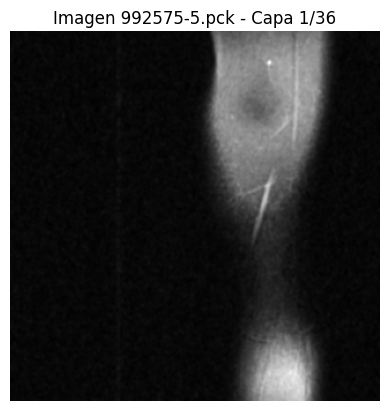

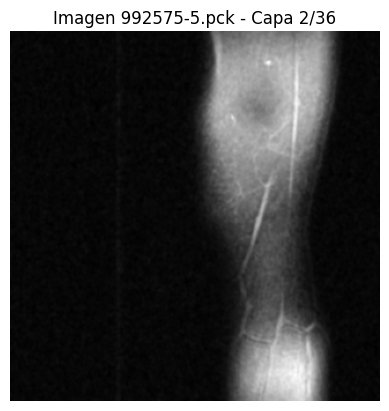

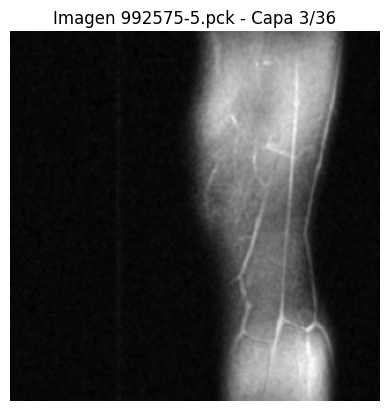

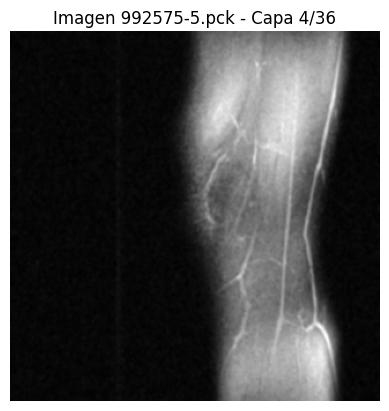

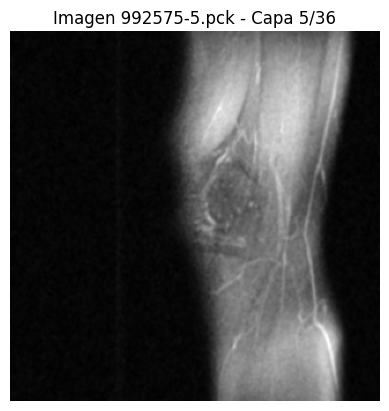

In [ ]:
#INSPECCIONES 1 imagen DEL FOLDER NORMALIZED

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
target_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')  # Directorio de destino

# Obtener la lista de archivos .pck en la carpeta de destino
archivos_pck = [f for f in os.listdir(target_dir) if f.endswith('.pck')]

if archivos_pck:
    # Seleccionar un archivo aleatorio
    archivo_aleatorio = random.choice(archivos_pck)
    file_path = os.path.join(target_dir, archivo_aleatorio)

    # Intentar cargar el archivo .pck
    try:
        with open(file_path, 'rb') as file_handler:
            data = pickle.load(file_handler)
            # Verificar si los datos son un ndarray
            if isinstance(data, np.ndarray):
                # Imprimir la forma del ndarray para ver su estructura
                print(f"Estructura de los datos: {data.shape}")

                # Mostrar algunas capas de la imagen
                num_layers = data.shape[0]
                num_to_show = min(num_layers, 5)  # Mostrar hasta 5 capas

                for i in range(num_to_show):
                    plt.imshow(data[i], cmap='gray')
                    plt.title(f"Imagen {archivo_aleatorio} - Capa {i+1}/{num_layers}")
                    plt.axis('off')
                    plt.show()
            else:
                print(f"El archivo {archivo_aleatorio} no contiene un ndarray.")
    except Exception as e:
        print(f"Error al cargar el archivo {archivo_aleatorio}: {e}")
else:
    print(f"No se encontraron archivos .pck en el directorio {target_dir}.")




#VIII Etiquetado DE TODO NORMALIZED

In [ ]:
## Etiquetado DE TODO NORMALIZED

from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import pickle

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
metadata_path = os.path.join(main_directory, 'metadata.csv')
vol110_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')

# Cargar el archivo metadata.csv
metadata_df = pd.read_csv(metadata_path)

# Crear un diccionario que mapee volumeFilename a aclDiagnosis
label_mapping = dict(zip(metadata_df['volumeFilename'], metadata_df['aclDiagnosis']))

# Crear un diccionario para almacenar las asociaciones de archivos y etiquetas
file_label_dict = {}

# Listar archivos sin etiquetas
files_without_labels = []

# Verificar que todos los archivos en el directorio tengan una entrada en el CSV
for file_name in os.listdir(vol110_dir):
    if file_name.endswith('.pck'):
        if file_name in label_mapping:
            file_label_dict[file_name] = label_mapping[file_name]
        else:
            files_without_labels.append(file_name)

# Contar el número total de archivos en el directorio Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED
total_files_in_dir = len([name for name in os.listdir(vol110_dir) if name.endswith('.pck')])

# Mostrar el número total de archivos en el directorio
print(f"Total de archivos en el directorio 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED': {total_files_in_dir}")

# Mostrar el número total de archivos procesados y etiquetados
total_files = len(file_label_dict)
print(f"Total de archivos procesados y etiquetados: {total_files}")

# Mostrar archivos que no tienen etiquetas
if files_without_labels:
    print(f"Archivos sin etiquetas: {len(files_without_labels)}")
    for file_name in files_without_labels:
        print(file_name)
else:
    print("Todos los archivos tienen etiquetas.")

# Guardar las asociaciones de archivos y etiquetas
mapping_path = os.path.join(main_directory, 'file_label_mapping.pkl')
with open(mapping_path, 'wb') as f:
    pickle.dump(file_label_dict, f)

print(f"Las asociaciones de archivos y etiquetas se han guardado en {mapping_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total de archivos en el directorio 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED': 917
Total de archivos procesados y etiquetados: 917
Todos los archivos tienen etiquetas.
Las asociaciones de archivos y etiquetas se han guardado en /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/file_label_mapping.pkl


# Paso 1: División de Datos

In [ ]:
import os
import pickle
from sklearn.model_selection import train_test_split

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
mapping_path = os.path.join(main_directory, 'file_label_mapping.pkl')

# Cargar el diccionario de asociaciones
with open(mapping_path, 'rb') as f:
    file_label_dict = pickle.load(f)

# Obtener listas de archivos y etiquetas
file_names = list(file_label_dict.keys())
labels = list(file_label_dict.values())

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
train_files, test_files, train_labels, test_labels = train_test_split(file_names, labels, test_size=0.2, stratify=labels, random_state=42)

# Verificar las divisiones
print(f"Total de archivos de entrenamiento: {len(train_files)}")
print(f"Total de archivos de prueba: {len(test_files)}")

# Guardar las divisiones en archivos pickle
train_data_path = os.path.join(main_directory, 'train_data.pkl')
test_data_path = os.path.join(main_directory, 'test_data.pkl')

with open(train_data_path, 'wb') as f:
    pickle.dump((train_files, train_labels), f)

with open(test_data_path, 'wb') as f:
    pickle.dump((test_files, test_labels), f)

print(f"Las divisiones de datos se han guardado en {train_data_path} y {test_data_path}")


Total de archivos de entrenamiento: 733
Total de archivos de prueba: 184
Las divisiones de datos se han guardado en /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/train_data.pkl y /content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/test_data.pkl


#VIII Paso 2: Preparación del Dataset
Tareas:
1.	Cargar los datos etiquetados:
o	Cargar los archivos train_data.pkl y test_data.pkl que contienen las listas de nombres de archivos y sus etiquetas.
2.	Preprocesar las imágenes:
o	Leer y preprocesar las imágenes para asegurarse de que estén en el formato correcto para el modelo.
o	Redimensionar las imágenes si es necesario y normalizarlas.
3.	Crear un dataset compatible con el framework de machine learning:
o	Crear un dataset que sea compatible con TensorFlow (tf.data.Dataset) o PyTorch (torch.utils.data.Dataset).


In [ ]:
#2.1 MEJOR ?

import os
import pickle
import numpy as np
import tensorflow as tf

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
train_data_path = os.path.join(main_directory, 'train_data.pkl')
test_data_path = os.path.join(main_directory, 'test_data.pkl')

# Cargar los datos de entrenamiento
with open(train_data_path, 'rb') as f:
    train_files, train_labels = pickle.load(f)

# Cargar los datos de prueba
with open(test_data_path, 'rb') as f:
    test_files, test_labels = pickle.load(f)

# Verificar la carga de datos
print(f"Total de archivos de entrenamiento cargados: {len(train_files)}")
print(f"Total de archivos de prueba cargados: {len(test_files)}")

# Directorio de origen de los archivos .pck
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')

# Función para cargar las imágenes
def load_image(file_path):
    with open(file_path, 'rb') as file_handler:
        data = pickle.load(file_handler)
    return data

# Función para generar el dataset de TensorFlow
def generate_dataset(file_list, labels, source_dir):
    def generator():
        for file_name, label in zip(file_list, labels):
            file_path = os.path.join(source_dir, file_name)
            image = load_image(file_path)
            yield image, label
    return tf.data.Dataset.from_generator(generator, output_signature=(
        tf.TensorSpec(shape=(36, 320, 320), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    ))

# Crear datasets de TensorFlow
train_dataset = generate_dataset(train_files, train_labels, source_dir)
test_dataset = generate_dataset(test_files, test_labels, source_dir)

# Verificar los datasets
for image, label in train_dataset.take(1):
    print(f"Imagen: {image.shape}, Etiqueta: {label.numpy()}")

for image, label in test_dataset.take(1):
    print(f"Imagen: {image.shape}, Etiqueta: {label.numpy()}")


Total de archivos de entrenamiento cargados: 733
Total de archivos de prueba cargados: 184
Imagen: (36, 320, 320), Etiqueta: 0
Imagen: (36, 320, 320), Etiqueta: 2


In [ ]:
#Paso 2.2: Preprocesar las imágenes en lotes y 2.3 crear dataset ...

import numpy as np
import os
import pickle
import tensorflow as tf

# Directorio de origen de los archivos .pck
source_dir = os.path.join(main_directory, 'Vol110-NEWFORMAT320x320x36GAUSS-NORMALIZED')

# Función para cargar las imágenes
def load_image(file_path):
    with open(file_path, 'rb') as file_handler:
        data = pickle.load(file_handler)
    return data

# Función para generar el dataset de TensorFlow
def generate_dataset(file_list, labels, source_dir):
    def generator():
        for file_name, label in zip(file_list, labels):
            file_path = os.path.join(source_dir, file_name)
            image = load_image(file_path)
            yield image, label
    return tf.data.Dataset.from_generator(generator, output_signature=(
        tf.TensorSpec(shape=(36, 320, 320), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    ))

# Crear datasets de TensorFlow
train_dataset = generate_dataset(train_files, train_labels, source_dir)
test_dataset = generate_dataset(test_files, test_labels, source_dir)

# Verificar los datasets
for image, label in train_dataset.take(1):
    print(f"Imagen: {image.shape}, Etiqueta: {label.numpy()}")

for image, label in test_dataset.take(1):
    print(f"Imagen: {image.shape}, Etiqueta: {label.numpy()}")




Imagen: (36, 320, 320), Etiqueta: 0
Imagen: (36, 320, 320), Etiqueta: 2


#3.DEFINICION DE MODELO AD-HOC



In [ ]:
# Código para la Definición del Modelo Ad-hoc

import tensorflow as tf
from tensorflow.keras import layers, models

# Adaptar las capas de entrada para manejar imágenes de 36 canales
input_layer = layers.Input(shape=(36, 320, 320, 1))

# Convertir las 36 capas a 3 canales utilizando una serie de capas convolucionales
x = layers.Conv3D(4, (3, 3, 3), padding='same', activation='relu')(input_layer)
x = layers.MaxPooling3D((2, 2, 2))(x)
x = layers.Conv3D(8, (3, 3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling3D((2, 2, 2))(x)
x = layers.Conv3D(16, (3, 3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling3D((2, 2, 2))(x)

# Aplanar la salida y usar capas densas
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Añadir Dropout para evitar el sobreajuste
output_layer = layers.Dense(3, activation='softmax')(x)

# Crear el modelo completo
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Verificar la estructura del modelo
model.summary()





Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 36, 320, 320, 1   0         
                             )]                                  
                                                                 
 conv3d_14 (Conv3D)          (None, 36, 320, 320, 4)   112       
                                                                 
 max_pooling3d_14 (MaxPooli  (None, 18, 160, 160, 4)   0         
 ng3D)                                                           
                                                                 
 conv3d_15 (Conv3D)          (None, 18, 160, 160, 8)   872       
                                                                 
 max_pooling3d_15 (MaxPooli  (None, 9, 80, 80, 8)      0         
 ng3D)                                                           
                                                           

In [ ]:
#Función para Cargar Imágenes

import numpy as np
import pickle

# Función para cargar las imágenes
def load_image(file_path):
    with open(file_path, 'rb') as file_handler:
        data = pickle.load(file_handler)
    # Asegúrate de que la imagen tenga la forma correcta (36, 320, 320, 1)
    data = np.expand_dims(data, axis=-1)  # Añade el canal de profundidad si falta
    return data


In [ ]:
#Generador de Datos

import tensorflow as tf

# Función para generar el dataset de TensorFlow
def generate_dataset(file_list, labels, source_dir):
    def generator():
        for file_name, label in zip(file_list, labels):
            file_path = os.path.join(source_dir, file_name)
            image = load_image(file_path)
            yield image, label
    return tf.data.Dataset.from_generator(generator, output_signature=(
        tf.TensorSpec(shape=(36, 320, 320, 1), dtype=tf.float32),  # Asegúrate de que la forma sea correcta
        tf.TensorSpec(shape=(), dtype=tf.int32)
    ))

# Crear datasets de TensorFlow
train_dataset = generate_dataset(train_files, train_labels, source_dir)
test_dataset = generate_dataset(test_files, test_labels, source_dir)

# Asegurarse de que los datasets tengan un tamaño de lote definido y prefetching
batch_size = 4  # Ajusta según sea necesario
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Entrenamiento del Modelo

# Definir parámetros de entrenamiento
batch_size = 32  # Reducir el tamaño del lote
epochs = 5  # Reducir el número de épocas

# Entrenar el modelo
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

# Guardar el modelo entrenado
model.save(os.path.join(main_directory, 'trained_model.h5'))



Epoch 1/5
     61/Unknown - 1542s 25s/step - loss: 0.7705 - accuracy: 0.7910

KeyboardInterrupt: 

In [ ]:
#CANCELACION POR TIEMPO
#2. Guardar el Modelo Actual


# Guardar el modelo entrenado hasta el momento
model.save(os.path.join(main_directory, 'partial_trained_model.h5'))
print("Modelo guardado como 'partial_trained_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado como 'partial_trained_model.h5'


In [ ]:
#3. Cargar el Modelo Guardado
#Carga el modelo guardado para proceder a la evaluación.

model = tf.keras.models.load_model(os.path.join(main_directory, 'partial_trained_model.h5'))
print("Modelo cargado desde 'partial_trained_model.h5'")


Modelo cargado desde 'partial_trained_model.h5'


In [ ]:
#4. Evaluar en el Conjunto de Prueba
#Evalúa el modelo en el conjunto de prueba para obtener las métricas de rendimiento


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Loss en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


      7/Unknown - 77s 11s/step - loss: 0.8077 - accuracy: 0.7143

KeyboardInterrupt: 

#4.EVALUACION DEL MODELO

In [ ]:
#Código Completo para la Evaluación

import os
import tensorflow as tf

# Directorio principal
main_directory = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024'
model_path = os.path.join(main_directory, 'partial_trained_model.h5')

# Cargar el modelo guardado
model = tf.keras.models.load_model(model_path)
print("Modelo cargado desde 'partial_trained_model.h5'")

# Tamaño del lote
batch_size = 32

# Número de archivos de prueba
num_test_files = len(test_files)

# Calcular el número de pasos de validación
validation_steps = num_test_files // batch_size
if num_test_files % batch_size != 0:
    validation_steps += 1

print(f"Número total de pasos de validación: {validation_steps}")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_dataset, steps=validation_steps)
print(f"Loss en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Modelo cargado desde 'partial_trained_model.h5'
Número total de pasos de validación: 6
6/6 [==============================] - 65s 10s/step - loss: 0.7938 - accuracy: 0.7083
Loss en el conjunto de prueba: 0.7937569618225098
Precisión en el conjunto de prueba: 0.7083333134651184


#RELACION CON DATA DE STANFORD

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import cv2  # OpenCV para redimensionar imágenes
from tensorflow.keras.models import load_model

# Montar Google Drive (si es necesario)
from google.colab import drive
drive.mount('/content/drive')

# Directorio de las nuevas imágenes normalizadas
new_photos_dir = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024 - STANFORD/corpus_sagittal_croacia_gauss_Normalized'

# Cargar el modelo entrenado
model_path = '/content/drive/My Drive/PUCP IA - Des. App. Visual - Trabajo Final 2024/model.h5'
model = load_model(model_path)

# Verificar que la ruta es correcta
print("Archivos en el directorio especificado:")
print(os.listdir(new_photos_dir))

# Predecir etiquetas para las nuevas fotos normalizadas
predictions = []
for image_name in os.listdir(new_photos_dir):
    image_path = os.path.join(new_photos_dir, image_name)
    if image_path.endswith('.pck'):
        try:
            with open(image_path, 'rb') as file_handler:
                data = pickle.load(file_handler)
                if isinstance(data, np.ndarray):
                    # Redimensionar la imagen a (128, 128)
                    data_resized = cv2.resize(data, (128, 128))
                    # Añadir una dimensión extra para el canal y el batch
                    data_resized = np.expand_dims(data_resized, axis=-1)  # Añadir la dimensión del canal
                    data_resized = np.expand_dims(data_resized, axis=0)  # Añadir la dimensión del batch

                    # Asegurarse de que los datos tienen el formato correcto para la predicción
                    prediction = model.predict(data_resized)
                    prediction = (prediction > 0.5).astype(int)  # Convertir la probabilidad a etiqueta binaria
                    predictions.append((image_name, prediction[0][0]))  # prediction[0][0] para obtener la etiqueta binaria
                else:
                    print(f"El archivo {image_name} no contiene un ndarray.")
        except Exception as e:
            print(f"Error al cargar el archivo {image_name}: {e}")

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame(predictions, columns=['Imagen', 'Predicción'])

# Mostrar las predicciones
print(df_predictions.to_markdown(index=False))

print("Proceso de predicción completado.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivos en el directorio especificado:
['1212.pck', '1213.pck', '1214.pck', '1215.pck', '1216.pck', '1217.pck', '1218.pck', '1204.pck', '1205.pck', '1206.pck', '1207.pck', '1208.pck', '1209.pck', '1210.pck', '1197.pck', '1198.pck', '1199.pck', '1200.pck', '1201.pck', '1202.pck', '1203.pck', '1191.pck', '1192.pck', '1193.pck', '1194.pck', '1195.pck', '1196.pck', '1184.pck', '1185.pck', '1186.pck', '1187.pck', '1188.pck', '1189.pck', '1190.pck', '1177.pck', '1178.pck', '1179.pck', '1180.pck', '1181.pck', '1182.pck', '1183.pck', '1170.pck', '1171.pck', '1172.pck', '1173.pck', '1174.pck', '1175.pck', '1176.pck', '1163.pck', '1164.pck', '1165.pck', '1166.pck', '1167.pck', '1168.pck', '1169.pck', '1156.pck', '1157.pck', '1158.pck', '1159.pck', '1160.pck', '1161.pck', '1162.pck', '1149.pck', '1150.pck', '1151.pck', '1152.pck', '1153.pck', '1154.pck', '1155.pck', '1